In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Settings

In [2]:
# SUBJ_ID = "784565"
# SUBJ_ID = "786569"
SUBJ_ID = "789373"
DATA_DIR = "/home/agajan/experiment_DiffusionMRI/tractseg_data/"

# FEATURES_NAMES = ["PCA",
#                   "PCA_COORDS",
#                   "MSCONVAE",
#                   "MSCONVAE_COORDS"]
# FEATURE_LABELS = ["PCA (k=10)", "PCA (k=10) + Coords.", "MS-ConvAE", "MS-ConvAE + Coords."]

FEATURES_NAMES = ["PCA_dice_based", "PCA_COORDS_dice_based", 
                  "MSCONVAE_dice_based", "MSCONVAE_COORDS_dice_based"]
FEATURE_LABELS = ["PCA (k=10)", "PCA (k=10) + Coords.", "MS-ConvAE", "MS-ConvAE + Coords."]

In [3]:
data = []
for fidx, feature_name in enumerate(FEATURES_NAMES):
    stats_path = join(DATA_DIR, SUBJ_ID, "simulation_data", feature_name + ".npz")
    stats = np.load(stats_path)
    N = len(stats["iters"])
    data += [[FEATURE_LABELS[fidx],
              stats["iters"][i], stats["scores"][i], 
              stats["cg"][i], stats["cst"][i],
              stats["cst"][i], stats["fx"][i],
              ] for i in range(N)]

df = pd.DataFrame(data, columns=["Features",
                                 "Iterations", "Avg. DICE Score", 
                                 "CG DICE Score", "CST DICE Score", 
                                 "FX DICE Score", "CC DICE Score"])
df.head(10)

,Features,Iterations,Avg. DICE Score,CG DICE Score,CST DICE Score,FX DICE Score,CC DICE Score
0,PCA (k=10),1,0.428297,0.331489,0.447050,0.447050,0.365309
1,PCA (k=10),2,0.467172,0.367684,0.488774,0.488774,0.406439
2,PCA (k=10),3,0.493829,0.390527,0.511138,0.511138,0.445937
3,PCA (k=10),4,0.548063,0.455868,0.549534,0.549534,0.551765
4,PCA (k=10),5,0.561099,0.474616,0.570802,0.570802,0.561510
5,PCA (k=10),6,0.580220,0.503580,0.589674,0.589674,0.576598
6,PCA (k=10),7,0.601504,0.518069,0.605425,0.605425,0.632159
7,PCA (k=10),8,0.610504,0.530161,0.624979,0.624979,0.634279
8,PCA (k=10),9,0.635972,0.551134,0.643234,0.643234,0.690694
9,PCA (k=10),10,0.648103,0.562815,0.658895,0.658895,0.708311


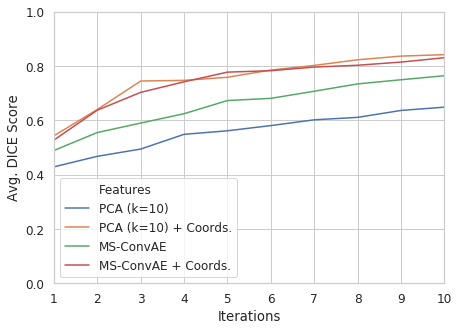

In [4]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid", font_scale=1.1)
sns.lineplot(x="Iterations", y="Avg. DICE Score", hue="Features", data=df)
plt.ylim((0, 1))
plt.xlim((1, N))
plt.show()
# sns.set(font_scale=1.25, style="whitegrid")
# ordered= df.Coordinates.value_counts().index
# g = sns.FacetGrid(df, col="Coordinates", row_order=ordered, height=5, aspect=1.25, legend_out=False, ylim=(0, 1))
# g.map(sns.lineplot, "Iterations", "DICE Score", hue="Features", data=df)
# plt.legend()
# plt.show()